In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.api import add_constant, OLS

In [2]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.shape

(1338, 7)

<Axes: ylabel='charges'>

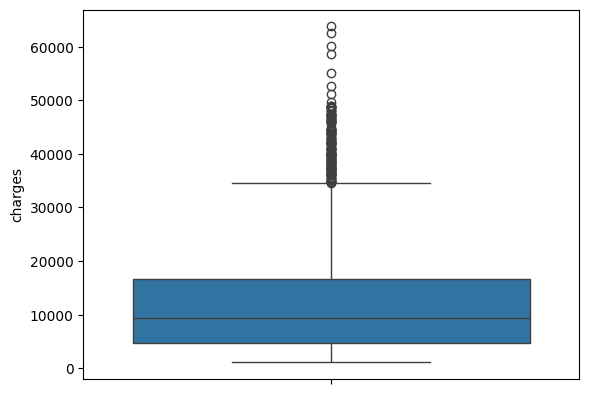

In [7]:
sns.boxplot(df['charges'])

In [8]:
hp=sorted(df['charges'])   # using quantile outliers removal

q1, q3=np.percentile(hp,[25,75])

lower_bound=q1-(1.5 *(q3-q1))
upper_bound=q3+(1.5* (q3-q1))

below=df['charges'] > lower_bound
above=df['charges'] < upper_bound

df=df[below & above]

In [9]:
df
df.shape

(1199, 7)

C:\Users\victo\AppData\Local\Temp\ipykernel_828\1319113370.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


<Axes: xlabel='charges', ylabel='Density'>

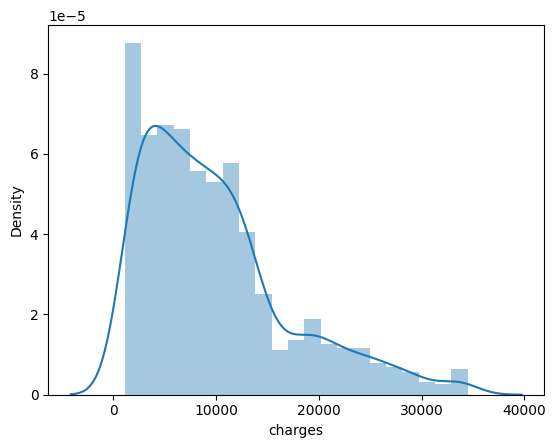

In [10]:
sns.distplot(df['charges'])

In [11]:
fullraw2=pd.get_dummies(df)
print(fullraw2.shape)
fullraw2.head()

(1199, 12)


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [12]:
x= fullraw2.drop(['charges'],axis=1)
y=fullraw2['charges']

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(959, 11)
(240, 11)
(959,)
(240,)


In [14]:
x_train.columns

Index(['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model=LinearRegression().fit(x_train, y_train)

In [17]:
y_pred=model.predict(x_test)

In [18]:
predi= model.score(x_test,y_test)
predi

0.6192966378869834

In [19]:
1-(1-model.score(x_test,y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)  # Adjusted score

0.6009293704166185

Text(0, 0.5, 'residuals')

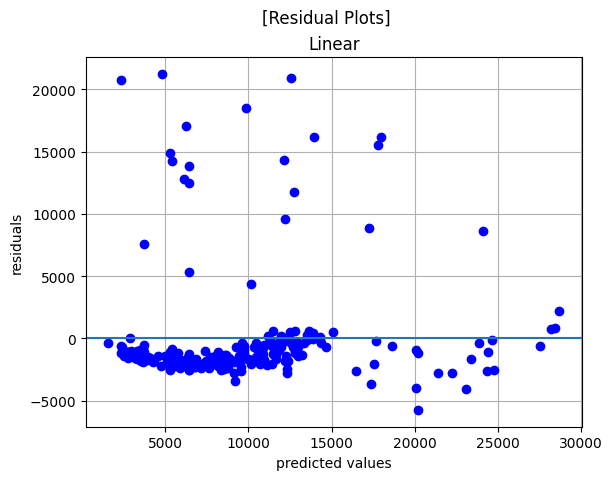

In [20]:
fig,axes=plt.subplots(1,1)

fig.suptitle('[Residual Plots]')  #fig.set_size_inches(10,8)

axes.plot(y_pred,y_test-y_pred,'bo')  # bo - represent dot points
axes.axhline(y=0)   # represent horizontal line
axes.grid()

axes.set_title('Linear')
axes.set_xlabel('predicted values')
axes.set_ylabel('residuals')


C:\Users\victo\AppData\Local\Temp\ipykernel_828\1795168953.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals_linear)


Text(0.5, 1.0, 'Linear')

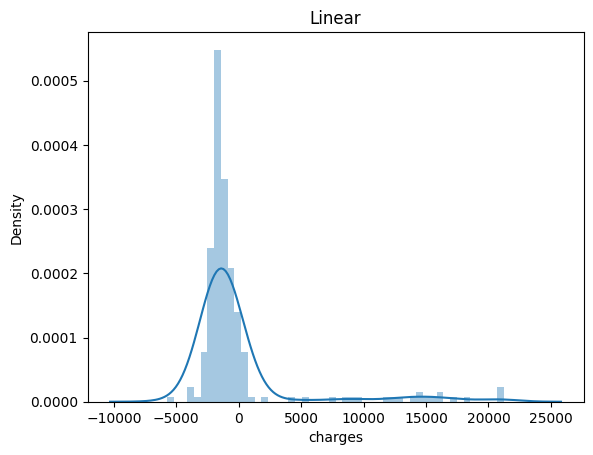

In [21]:
residuals_linear=y_test-y_pred

sns.distplot(residuals_linear)

plt.title('Linear')

<Axes: title={'center': 'Model Coefficients'}>

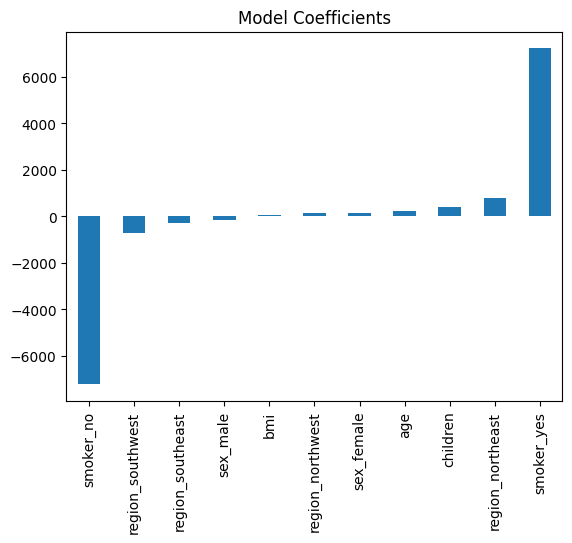

In [22]:
predictors=x_train.columns       # coeff values using x_train as bar graph

coef=pd.Series(model.coef_,predictors).sort_values()
coef.plot(kind='bar',title='Model Coefficients')

#### Regularisation

In [23]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [24]:
ridgereg=Ridge(alpha=0.1)

x3=fullraw2.drop(['charges'],axis=1).copy()
y3=fullraw2['charges'].copy()

x_train3,x_test3,y_train3,y_test3=train_test_split(x3,y3,test_size=0.20, random_state=150)

ridgereg.fit(x_train,y_train)

y_pred=ridgereg.predict(x_test3)

score4=ridgereg.score(x_test3,y_test3)


In [25]:
score4

0.7004515022392905

In [26]:
ridgereg.coef_

array([  241.32512325,    57.88768861,   407.12374365,   163.41339279,
        -163.41339279, -7229.1427042 ,  7229.1427042 ,   806.16140355,
         157.77220297,  -267.92310712,  -696.01049939])

<Axes: title={'center': 'model coefficient'}>

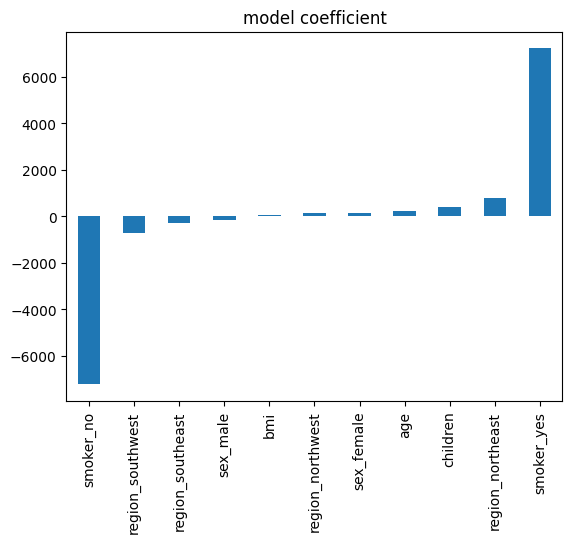

In [27]:
predictors=x_train.columns

coef=pd.Series(ridgereg.coef_,predictors).sort_values()
coef.plot(kind='bar', title='model coefficient')

In [28]:
lassoreg=Lasso(alpha=0.0001)

lassoreg.fit(x_train3,y_train3)

pred=lassoreg.predict(x_test3)

score5=lassoreg.score(x_test3,y_test3)
score5

0.6920606856065208

In [29]:
lassoreg.coef_

array([ 2.48537106e+02,  4.80320495e+01,  4.02115952e+02,  2.72851125e+02,
       -6.54943642e-14, -1.41490233e+04,  3.65923247e-11,  9.77086191e+02,
        9.03843434e+02,  7.18667251e+01, -3.60246544e+02])

<Axes: title={'center': 'model coefficient'}>

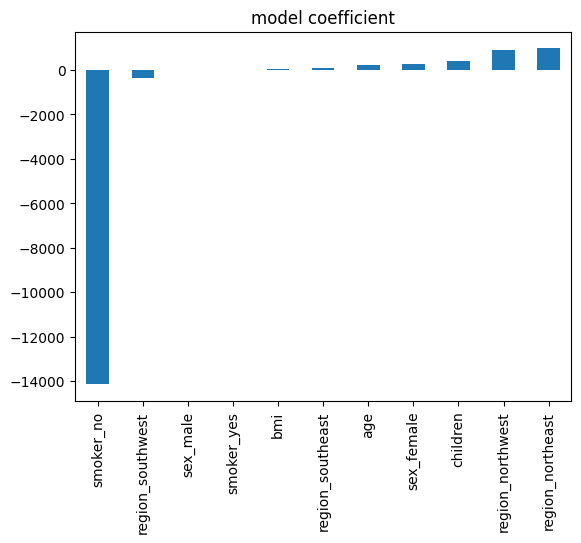

In [30]:
predictors=x_train.columns

coef=pd.Series(lassoreg.coef_,predictors).sort_values()
coef.plot(kind='bar',title='model coefficient')

In [34]:
print('all model score is:')
print('simple linear regression:', predi)
print('ridge regression:', score4)
print('lasso regression:', score5)


all model score is:
simple linear regression: 0.6192966378869834
ridge regression: 0.7004515022392905
lasso regression: 0.6920606856065208
